In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [22]:
size = (100,2)
names, xlabels, frozen_rvs, samples = [], [], [], []

# Extract names and sane parameters of all scipy probability distributions
# (except the deprecated ones) and loop through them to create lists of names,
# frozen random variables, samples of random variates and x labels
for name, params in stats._distr_params.distcont:
    if name not in ['frechet_l', 'frechet_r']:
        loc, scale = 0, 1
        params = list(params) + [loc, scale]

        # Create instance of random variable
        dist = getattr(stats, name)

        # Create frozen random variable using parameters and add it to the list
        # to be used to draw the probability density functions
        rv = dist(*params)
        frozen_rvs.append(rv)

        # Create sample of random variates
        gen = rv.rvs(size=size)
        flag = False
        for i in gen:
            if (sum(1 for k in i if k < 0)) > 0:
                flag = True
        if flag:
            continue
        samples.append(gen)
        names.append(name)

        # Create x label containing the distribution parameters
        p_names = ['loc', 'scale']
        # print(dist.shapes)
        if dist.shapes:
            p_names = [sh.strip() for sh in dist.shapes.split(',')] + ['loc', 'scale']
        xlabels.append(', '.join([f'{pn}={pv:.2f}' for pn, pv in zip(p_names, params)]))

a
None
chi
a, b
a, b
c
c, d
c, d
df
df
a
None
b
a, c
dfn, dfd
c
c
c
c
a
a, b, c, z
a, b, c
a, c
a, c
c
p, b
beta
c
None
c
None
None
None
a
mu
c
a, b
a
n
n
None
None
c
s
a, b
c
None
k, s
nu
dfn, dfd, nc
df, nc
b
a
c, s
None
mu
a, b
b
c, d
c
b
a, b
None
None
c
c


In [23]:
# Create pandas dataframe containing all the samples
data_s = np.array(samples).reshape(len(samples),-1)
print(data_s.shape)
df = pd.DataFrame(data=data_s.T, columns=[name for name in names])
# index = df.columns[(df>=0).all()].tolist()
# df = df.loc[:,(df>=0).all()]
# print(df.shape)
df.head()

(66, 200)


,alpha,arcsine,argus,beta,betaprime,bradford,burr,burr12,chi,chi2,...,reciprocal,rice,trapz,triang,truncexpon,truncnorm,uniform,wald,weibull_min,wrapcauchy
0,0.362203,0.124147,0.183052,0.481174,1.029387,0.417358,1.146646,0.791153,9.092837,53.159547,...,0.097046,0.082066,0.360363,0.184070,0.259580,0.938077,0.684340,0.812967,0.346636,5.612035
1,0.230471,0.922761,0.587186,0.969511,0.441543,0.486194,1.357489,0.805795,8.080649,43.591178,...,0.056555,1.063962,0.644054,0.212047,0.467253,0.122684,0.814683,0.382346,0.457662,0.271278
2,0.216502,0.006685,0.558127,0.509321,0.819695,0.212731,1.230990,0.996190,9.390293,46.415314,...,0.086502,1.906089,0.142262,0.575462,0.488794,0.698882,0.689273,0.637800,0.803272,4.700462
3,0.245027,0.996247,0.674348,0.481320,2.778997,0.356448,1.145504,0.811120,7.924001,62.510520,...,0.099888,1.354989,0.275983,0.308985,1.496960,0.211797,0.345264,0.585490,0.371224,0.499468
4,0.284213,0.931721,0.580260,0.928056,1.531716,0.627859,1.155256,0.911259,7.438580,61.028692,...,0.108287,2.482117,0.523939,0.261164,1.096746,0.512977,0.266583,3.779187,0.561395,4.740589


In [24]:
# Rename the duplicate column names by adding a period and an integer at the end
df.columns = pd.io.parsers.ParserBase({'names':df.columns})._maybe_dedup_names(df.columns)

(100, 66) (100, 66)


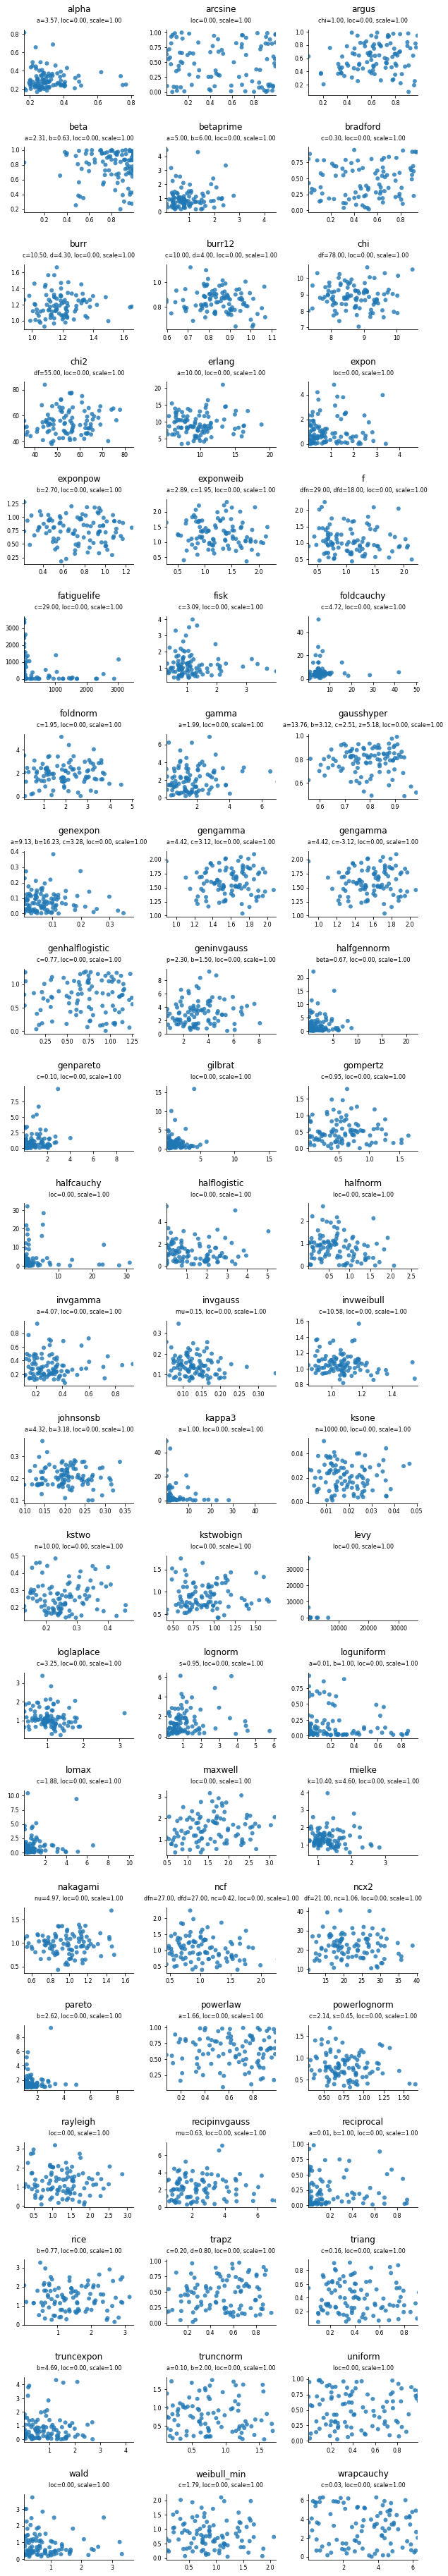

In [25]:
nplot = df.columns.size
cols = 3
rows = int(np.ceil(nplot/cols))
subp_w = 10/cols  # 10 corresponds to the figure width in inches
subp_h = 0.9*subp_w
fig,axes = plt.subplots(rows,cols, figsize=(cols*subp_w, rows*subp_h))

# # Create pandas grid of histograms
X = df.head(100)
Y = df.tail(100)
print(X.shape, Y.shape)

# for col in X.columns:
#     axs = plt.scatter(X[col], Y[col], label=col)
# axs = df.hist(density=True, bins=15, grid=False, edgecolor='w',
#               linewidth=0.5, legend=False,
#               layout=(rows, cols), figsize=(cols*subp_w, rows*subp_h))

# Loop over subplots to draw probability density function and apply some
# additional formatting
for idx, ax in enumerate(axes.flat[:df.columns.size]):
    rv = names[idx]
    # print(X[rv])

    ax.scatter(X[rv], Y[rv], alpha=0.8, edgecolors='none')
    ax.set_title(rv, pad=25)
    ax.set_xlim(X[rv].min(), Y[rv].max())
    ax.set_xlabel(xlabels[idx], fontsize=8, labelpad=10)
    ax.xaxis.set_label_position('top')
    ax.tick_params(axis='both', labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

ax.figure.subplots_adjust(hspace=0.8, wspace=0.3)
ax.figure.savefig("dist+.png")